# What are the most visitied squares in Monopoly?

Winning a game of Monopoly involves buying the right properties and building up the properties on the most important and spaces to maximise profit.

This project will focus on the first part of this problem. What properties are landed on the most and should be bought to incease footfall?

As a player does not move around the board in a random way, but according to:

* The total of two dice are used
* Game rules, as well as cards, dictate a player's position on the board sporadically

This notebook is a description of the Monte Carlo method and the results obtained. The script within the project simulated a player's movements around a board multiple times and output the probability of a player landing on any particular space.

In [92]:
from random import randint    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
plotly.offline.init_notebook_mode(connected=True)
plotly_plot = plotly.offline.iplot
import plotly.figure_factory as ff

import __main__ as game

Each square on the board is assigned a number, starting with 'Go' which was assigned 0. The player starts here at the beginning of each game.

## Dice rolls
How do dice rolls affect player position?
As we roll two dice, the sum of the dice are more likely to be a 6,7, or 8 than a 2 or a 12 for instance. 

Plotting throw statistics

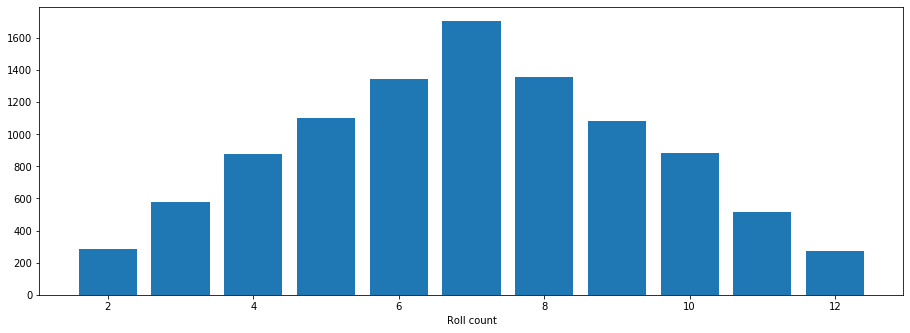

In [2]:
from dice import dice_roll

rolls = {}
for i in range(10000):
    roll = dice_roll()[0]
    if roll in rolls:
        rolls[roll] += 1
    else:
        rolls[roll] = 1

fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(list(rolls.keys()), rolls.values())
ax.set_xlabel('Roll count')
plt.show()

The dice_roll function, returns the value that the player moves and whether the roll was a double. When three rolls are accured consecutively, the player's position is set equal to 10 (Jail position)

In [3]:
from game import run_games

In [77]:
game_results = run_games()
xtab = game_results.apply(lambda r: r/r.sum()*100, axis=1)
print(xtab.head())

Begin 10000 games
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  8, 10, 11, 13, 14, 15, 16, 17, 18, 19,
            20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37,
            38, 39,  7, 12,  9],
           dtype='int64')
         0         1         2         3         4         5         6   \
0  0.990099  1.980198  1.980198  0.990099  0.990099  3.960396  2.970297   
1  4.166667  5.208333       NaN       NaN  4.166667  1.041667  1.041667   
2  0.990099  3.960396  2.970297       NaN  1.980198  2.970297  0.990099   
3  5.940594  2.970297  0.990099       NaN  2.970297  3.960396  1.980198   
4  2.970297  2.970297  1.980198  3.960396  1.980198  2.970297  1.980198   

         8         10        11  ...        33        34        35        36  \
0  2.970297  6.930693  2.970297  ...  1.980198  2.970297  0.990099  0.990099   
1  3.125000  8.333333  3.125000  ...  4.166667  1.041667  2.083333       NaN   
2  2.970297  6.930693  3.960396  ...  0.990099  2.970297  1.980198  0.99

In [100]:
mean_prop = xtab.mean(axis=0)
mean_prop.loc[30] = 0
mean_prop = mean_prop.sort_index()

In [109]:
# Adding labels
space_names = ['Go',
 'Old Kent Road',
 'Community Chest',
 'Whitechapel Road',
 'Income Tax',
 'King\'s Cross',
 'The Angel Islington',
 'Chance',
 'Euston Road',
 'Pentonville Road',
 'Jail',
 'Pall Mall',
 'Electric Company',
 'Whitehall',
 'Northumberland Avenue',
 'Marylebone Station',
 'Bow Street',
 'Community Chest',
 'Marlborough Street',
 'Vine Street',
 'Free Parking',
 'Strand',
 'Chance',
 'Fleet Street',
 'Trafalger Square',
 'Fenchurch St Station',
 'Leicester Square',
 'Coventry Street',
 'Water Works',
 'Piccadilly',
 'Go to Jail',
 'Regent Street',
 'Oxford Street',
 'Community Chest',
 'Bond Street',
 'Liverpool St Station',
 'Chance',
 'Park Lane',
 'Super Tax',
 'Mayfair'
]


In [110]:
print(mean_prop)

0     2.969894
1     2.345001
2     2.044424
3     2.409093
4     2.561160
5     2.863772
6     2.556908
7     1.753583
8     2.605919
9     2.535803
10    6.127773
11    2.475947
12    2.540811
13    2.951611
14    2.669253
15    2.800780
16    2.935835
17    3.042251
18    2.983624
19    3.361558
20    2.986100
21    2.929473
22    1.920457
23    2.886780
24    3.267453
25    2.913822
26    2.897243
27    2.869366
28    2.820978
29    2.774600
30    0.000000
31    2.853172
32    2.729594
33    2.418686
34    2.620414
35    2.591837
36    1.703418
37    2.370036
38    2.379125
39    2.730617
dtype: float64


<BarContainer object of 40 artists>

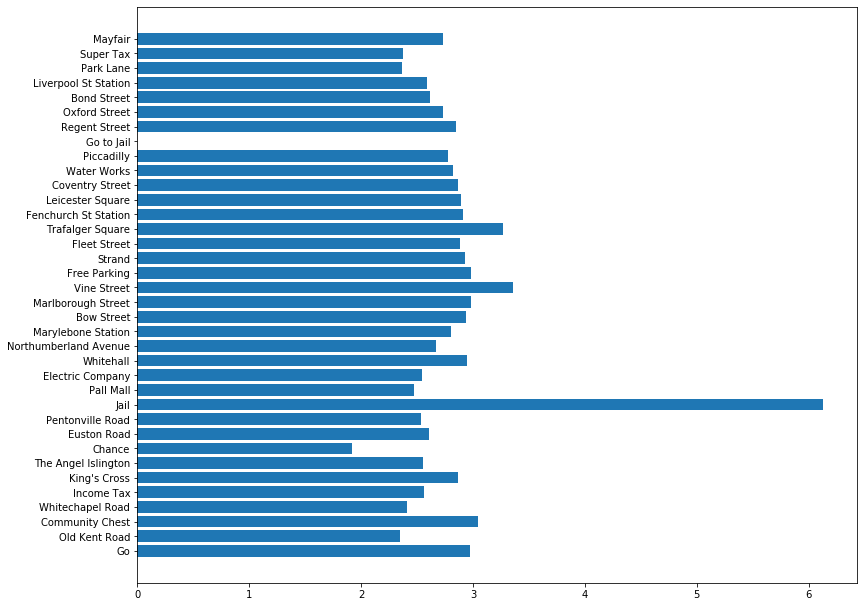

In [125]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
ax.barh(y=space_names, width=mean_prop)


* Jail is the most commonly visited space
* After that, Vine Street